In [1]:
import json

ATTACK = '1'
BENIGN = '0'

with open("../../data/pre_process/dissection_clean/both.json") as f:
    my_json = json.load(f)

total_dict = {
    BENIGN : [],
    ATTACK : [],
}

for dissected_pkt in my_json:

    is_attack = dissected_pkt["common"].pop("is_attack")
    attack_type = dissected_pkt["common"].pop("type")

    packet_dict = dissected_pkt["common"].copy()
    for protocols in dissected_pkt["protocols"].values():
        for layer in protocols:
            packet_dict.update(layer)

    total_dict[is_attack].append(packet_dict)

In [2]:
from datetime import datetime

ts_dict = {
    BENIGN : [],
    ATTACK : [],
}

for label in [BENIGN, ATTACK]:
    for packet in total_dict[label]:
        ts = packet["ts"]
        ts = datetime.fromtimestamp(ts)
        ts_dict[label].append(ts)

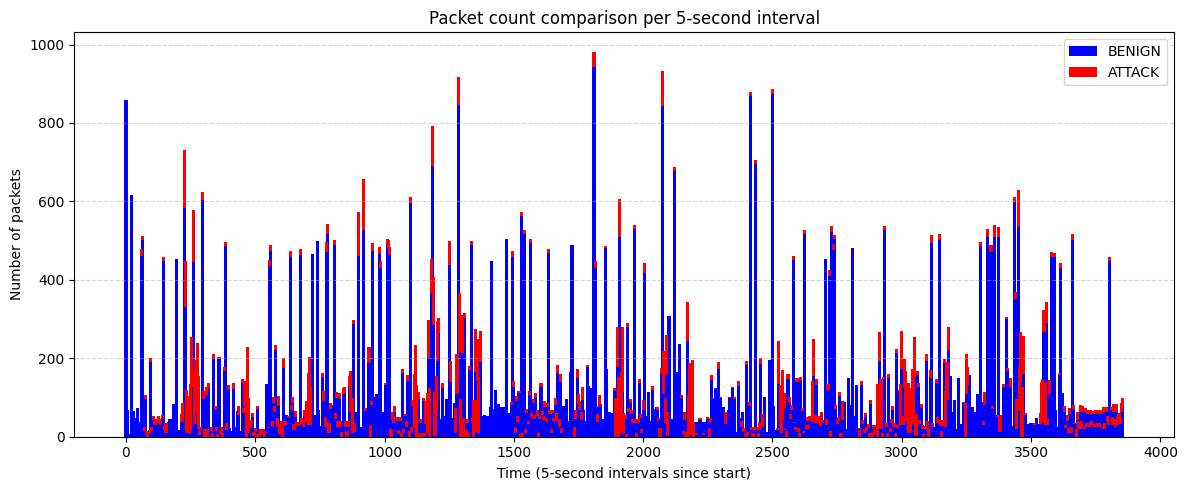

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

# Convert to DataFrame
df1 = pd.DataFrame({'time': ts_dict[BENIGN], 'source': BENIGN})
df2 = pd.DataFrame({'time': ts_dict[ATTACK], 'source': ATTACK})
df = pd.concat([df1, df2])

# Group into 5-second intervals
df['bin'] = (df['time'] - df['time'].min()).dt.total_seconds() // 5 * 5
df['bin'] = df['bin'].astype(int)

# Count occurrences per source and interval
counts = df.groupby(['bin', 'source']).size().unstack(fill_value=0)

# Ensure consistent order
counts = counts.sort_index()

# Create stacked bar plot
plt.figure(figsize=(12, 5))
plt.bar(counts.index, counts[BENIGN], width=12, color='blue', label='BENIGN')
plt.bar(counts.index, counts[ATTACK], width=12, bottom=counts[BENIGN], color='red', label='ATTACK')

# Formatting
plt.xlabel("Time (5-second intervals since start)")
plt.ylabel("Number of packets")
plt.title("Packet count comparison per 5-second interval")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()
